# Feature engineering

In this notebook, I try making various features prior to giving them to a linear classifier, as expected in the course.

Need a unified handling of the feature making:
* Expected input: the dataframe with time as index and every other features as columns. 
* Expected output: the datagrame with **the same index**. The columns can be anything:
    * Name of the feature, if the feature apply for **all** windfarms.
    > Example: mean of the temperature across all WF. `n_rows, 1` with column name being `mean_temperature` 
    * Multiindex with nume of the feature, windfarm (name: `WF`) if it is specific to each windfarm.
    > Example: temperature for each WF. `n_rows, 6` with columns being:
    >
    > `WF    1    2    3    4    5    6` 
    >
    > `var   mean_temperature`

## Mean values

We start by simply taking the mean values for each windfarms:


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

from features import mean_of_var, wind_speed
from load_utils import load_train_data

df = load_train_data()

In [3]:
means = []
for var in ['T', 'CLCT']:
    means.append(mean_of_var(df, var))

## Wind speed

We compute the mean of the windspeed, again accross all providers and all prediction, for each WF.

In [4]:
df_ws = wind_speed(df)

## Plots

We display the results

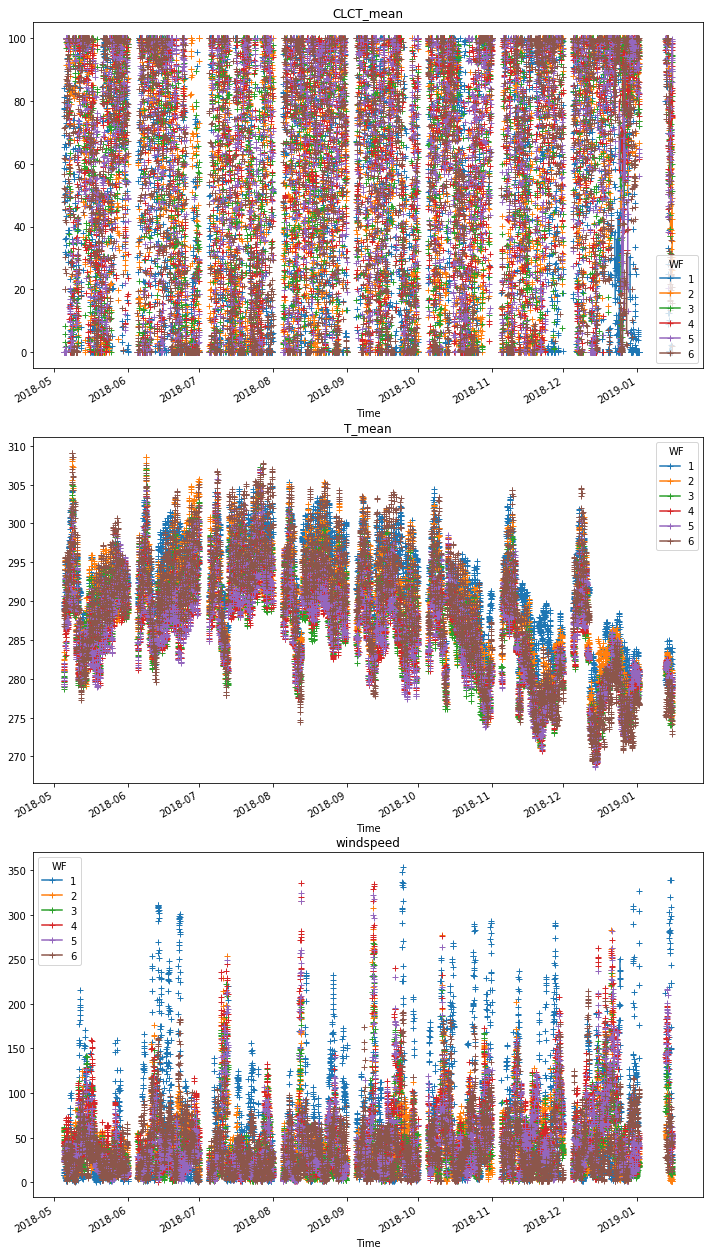

In [13]:
features = pd.concat(means + [df_ws])

fig, axes = plt.subplots(len(features.columns.levels[1]), 1, figsize=(12, 24))
for ax, var in zip(axes, features.columns.levels[1]):
    features.xs(var, level='var', axis=1).plot(marker='+', ax=ax)
    ax.set_title(var)
